<a href="https://colab.research.google.com/github/aherre52/MAT422/blob/main/HW_3_3_MAT_422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW 3.2: Unconstrained optimization**

Concepts covered:


* 3.3.1. Necessary and sufficient conditions of local minimizers
* 3.3.2. Convexity and global minimizers
* 3.3.3. Gradient descent

# 3.3.1. Necessary and sufficient conditions of local minimizers

$f: \mathbb{R}^d \to \mathbb{R}$ represents an unconstrained optimization problem. A **global minimizer** $x^*$ satisfies $f(x) \geq f(x^*)$ for all $x \in \mathbb{R}^d$. A **local minimizer** $x^*$ holds if $f(x) \geq f(x^*)$ in a neighborhood around $x^*$. The **first-order necessary condition** states that at a local minimizer, $\nabla f(x_0) = 0$. The **second-order necessary condition** requires that the Hessian matrix $Hf(x_0)$ be positive semidefinite at a local minimizer.

A **descent direction** at a point $x$ is a direction $d$ such that the **directional derivative** $f'(x; d) = \nabla f(x)^T d < 0$, indicating that moving in direction $d$ will decrease the value of $f$.The **sufficient conditions for local minimizers** state that if $\nabla f(x_0) = 0$ and the Hessian $Hf(x_0)$ is positive definite, then $x_0$ is a local minimizer.


# Code description

This Python code minimizes the function $f(x) = x_0^4 - 3x_0^3 + 2$ by first checking if a given point $x_0$ is a local minimizer. It does this by evaluating the gradient (first derivative) and the Hessian (second derivative) to confirm if the gradient is zero and the Hessian is positive definite. It also uses the scipy.optimize.minimize function to find the global minimum and displays the result.

In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.linalg import eigh

# Will define a function we want to minimize
def f(x):
    return x[0]**4 - 3*x[0]**3 + 2

# Define the gradient (first derivative) of the function
def gradient_f(x):
    grad = np.zeros_like(x)
    grad[0] = 4*x[0]**3 - 9*x[0]**2  # Gradient (first derivative)
    return grad

# Define the Hessian (second derivative) of the function
def hessian_f(x):
    H = np.zeros((len(x), len(x)))
    H[0, 0] = 12*x[0]**2 - 18*x[0]  # Hessian (second derivative)
    return H

# Will now check necessary condition for local minimizer:
# Gradient should be zero
def is_local_minimizer(x):
    grad = gradient_f(x)
    return np.allclose(grad, 0)

# Check sufficient condition for local minimizer:
# Hessian should be positive definite
def is_positive_definite(H):
    # Positive definite means all eigenvalues are positive
    eigvals = eigh(H, eigvals_only=True)
    return np.all(eigvals > 0)

# Will make an initial guess for checking local minimizer
x0 = np.array([2.0])

# Will now compute gradient and Hessian at the initial guess
grad_x0 = gradient_f(x0)
H_x0 = hessian_f(x0)

# Check if x0 is a local minimizer
if is_local_minimizer(x0):
    print(f"x0 = {x0} is a stationary point (Gradient = 0)")
    if is_positive_definite(H_x0):
        print("The Hessian is positive definite. x0 is a strict local minimizer.")
    else:
        print("The Hessian is not positive definite. x0 is not a strict local minimizer.")
else:
    print(f"x0 = {x0} is not a local minimizer (Gradient != 0).")

# Can utilize scipy's minimize function to find the minimum
res = minimize(f, x0, method='BFGS', jac=gradient_f, options={'disp': True})

# Finally, can print out the minimum
print(f"Global minimum found at: {res.x}")


x0 = [2.] is not a local minimizer (Gradient ≠ 0).
Optimization terminated successfully.
         Current function value: -6.542969
         Iterations: 5
         Function evaluations: 7
         Gradient evaluations: 7
Global minimum found at: [2.25]


# 3.3.2. Convexity and global minimizers

A function $f : \mathbb{R}^n \rightarrow \mathbb{R}$ is considered convex if, for any two points $x_1$ and $x_2$ in its domain, the line segment connecting $(x_1, f(x_1))$ and $(x_2, f(x_2))$ lies above or on the graph of the function, satisfying the condition $f(\lambda x_1 + (1 - \lambda)x_2) \leq \lambda f(x_1) + (1 - \lambda) f(x_2)$ for all $\lambda \in [0, 1]$. Affine functions, being linear transformations plus a constant, are convex functions and serve as fundamental examples in understanding convexity.

Furthermore, the first-order condition for convexity, which states that if the gradient exists, it must satisfy $g(x) \geq g(y) + \nabla f(y)^T (x - y)$ for all $x, y$. The second-order condition adds that a function is convex if its Hessian matrix is positive semi-definite at all points in the domain. Understanding these properties leads to identifying global minimizers effectively, as a convex function has a unique global minimum, simplifying optimization tasks.

# Code description

This code implements a gradient descent algorithm to find the global minimizer of the quadratic function $f(x) = 2x^2 + 3x + 1$. It calculates the gradient, defined as $g(x) = 4x + 3$, and uses it to iteratively update the variable $x$ until convergence, where the change in $x$ is less than a specified tolerance. The global minimizer is visually represented in a plot of the function, demonstrating how the algorithm approaches the minimum value.




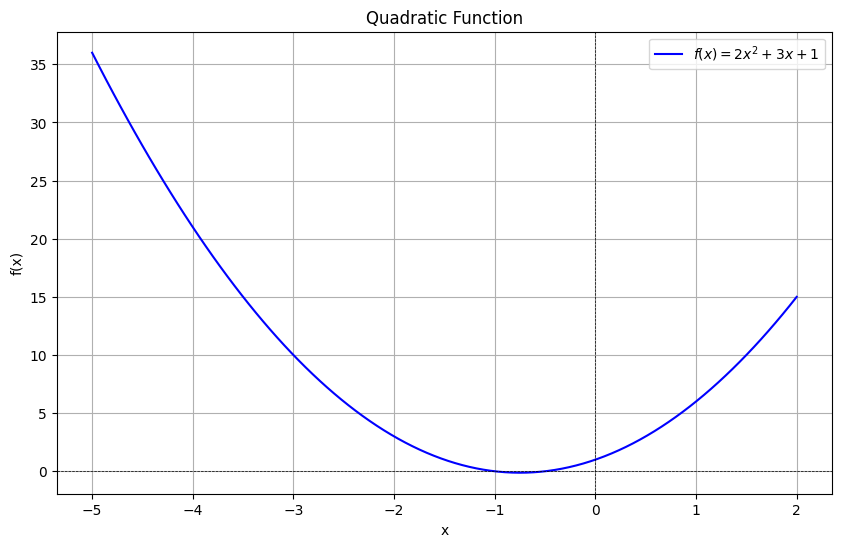

Global Minimizer: -0.7500, Iterations: 25


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function to use in this question
def f(x):
    return 2 * x**2 + 3 * x + 1

# Define the gradient of the function by taking first derivative
def gradient(x):
    return 4 * x + 3

# Define the Hessian of the function by taking second derivative of f(x)
def hessian(x):
    return 4  # constant for this quadratic function

# Function to find the global minimizer
# will set an automatic learning_rate of 0.1, inital x and tolerance
def find_global_minimizer(learning_rate=0.1, initial_x=0, tolerance=1e-6):
    x = initial_x
    iterations = 0
    while True:
        grad = gradient(x)
        x_new = x - learning_rate * grad

        # Check for convergence by checking tolerance
        if abs(x_new - x) < tolerance:
            break

        x = x_new
        iterations += 1
    return x, iterations

# Plotting the function
x_values = np.linspace(-5, 2, 100)
y_values = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=r'$f(x) = 2x^2 + 3x + 1$', color='blue')
plt.title('Quadratic Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()

# Will now call on find_global_minimizer
minimizer, num_iterations = find_global_minimizer()
print(f"Global Minimizer: {minimizer:.4f}, Iterations: {num_iterations}")


# 3.3.3. Gradient descent

The concept of gradient descent is introduced as an iterative optimization algorithm aimed at finding a local minimum of a differentiable function, $f : \mathbb{R}^d \rightarrow \mathbb{R}$. Emphasis is placed on the importance of gradient descent in solving unconstrained minimization problems of the form $\min_{x \in \mathbb{R}^d} f(x)$. To determine global minimizers, have to evaluate $f$ at multiple points or identify stationary points where the gradient, $\nabla f(x) = 0$, . The least-squares problem is presented as an example, showcasing how the normal equations arise from setting the gradient to zero.

Additionally, the steepest descent approach is described, which involves taking steps in the direction of the negative gradient to progressively reduce function values, and is mathematically represented as $v \frac{\partial f(x_0)}{\partial v} \geq \frac{\partial f(x_0)}{\partial v^*}$, where $v^* = -\frac{\nabla f(x_0)}{\|\nabla f(x_0)\|}$. Overall, gradient descent is a signficant and practical method for optimization in various applications.



# Code demonstration

This Python code implements the steepest descent algorithm to find the local minimum of a differentiable quadratic function, $f(x) = x^2 + 2x + 1$. It calculates the gradient of the function and iteratively updates the current point based on the negative gradient, storing each iteration in a path for visualization. The code then plots the function alongside the optimization path, illustrating how the algorithm converges to the minimum value.

Minimizer: -0.9999952109514348
Minimum value: 2.2934987242706484e-11


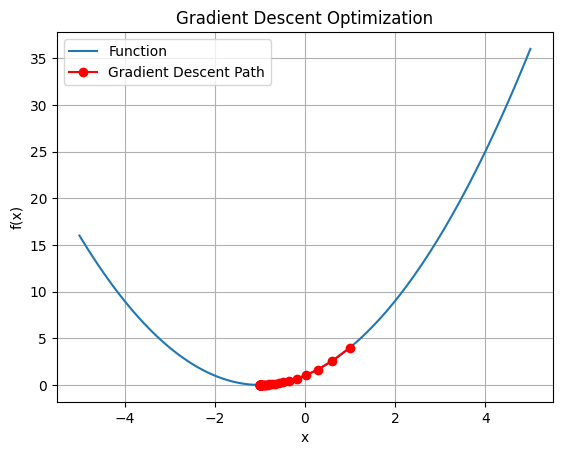

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define a differentiable function
def function(x):
    return x**2 + 2*x + 1

# Calculate the gradient of the function by taking first derivative
def gradient(x):
    return 2*x + 2

# Implement the steepest descent algorithm
def steepest_descent(x0, alpha, max_iter=100, tol=1e-5):
    x = x0
    # Initialize path with the starting point, will store the path im an list
    x_path = [x]
    for k in range(max_iter):
        gradient_value = gradient(x)
        if np.linalg.norm(gradient_value) < tol:  # Check for convergence
            break
        x = x - alpha * gradient_value  # Update the current point
        x_path.append(x)  # Store the current point in the path
    # Return final point and the path
    return x, x_path

# Set initial guess and parameters
x0 = 1.0
alpha = 0.1  # Step size
max_iter = 100
tol = 1e-5

# Perform gradient descent
result, x_path = steepest_descent(x0, alpha, max_iter, tol)

# Print the result
print("Minimizer:", result)
print("Minimum value:", function(result))

# Plot the function and the optimization path
x_values = np.linspace(-5, 5, 100)
y_values = function(x_values)
plt.plot(x_values, y_values, label="Function")

# Plot the gradient descent path
plt.plot(x_path, function(np.array(x_path)), 'ro-', label="Gradient Descent Path")  # 'ro-' for red circles

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Optimization")
plt.legend()
plt.grid()
plt.show()
